
### Cloning quasars (time to get your hands dirty).

Let's look at the redshift distributions of the quasars in the Sloan Digital Sky Survey.

The Sloan Digital Sky Survey or SDSS is a major multi-spectral imaging and spectroscopic redshift survey using a dedicated 2.5-m wide-angle optical telescope at Apache Point Observatory in New Mexico, United States. Operations started in 1998.

In phase 1, SDSS has released photometry data 357 million (!!!) unique sources and 1.6 million spectra. In phase 2, SDSS observed the same patch of the sky many times ("time domain astronomy", and now we're going to have LSST!)


Download the SDSS quasar data

In [59]:
from astroML.datasets import fetch_dr7_quasar

# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']



- Upsample this distribution in two ways, using both rejection sampling and inverse transform.
- Check, at least visually, that the two cloned distribitions are indeed similar to the observed one (for a quantitative check, come back to this point in a few lectures)
- Think about the cosmology of quasars. How do you think they are distributed? Overplot the theorethical distribution to the measured SDSS data. Does that agree with your expectation?

(Hint: It shouldn't. But why?)


In [60]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import poisson
import astropy


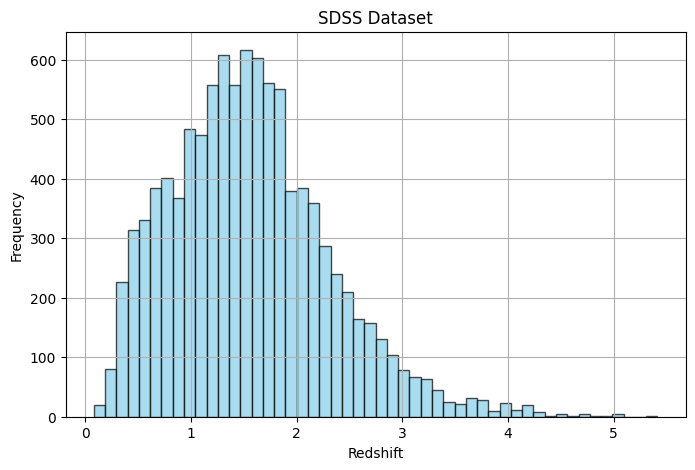

In [61]:
bins = 50

plt.figure(figsize=(8, 5))
counts, edges, figure = plt.hist(z, bins, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel("Redshift")
plt.ylabel("Frequency")
plt.title("SDSS Dataset")
plt.grid(True)
plt.show()

In [62]:
rng = np.random.default_rng()

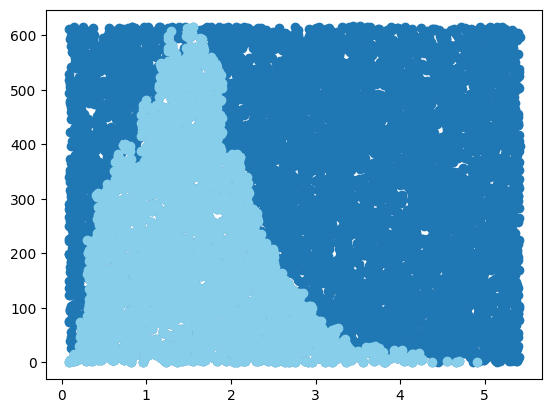

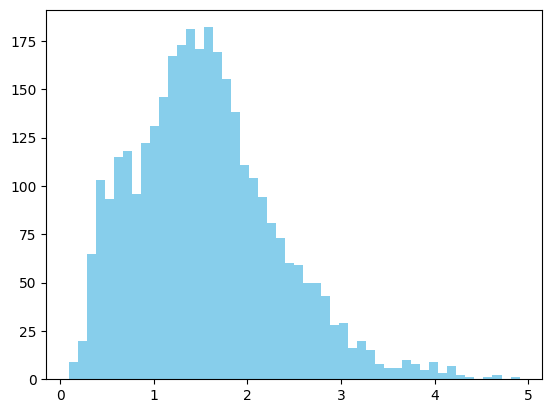

In [63]:
"REJECTION SAMPLING"

N = int(10000 / counts.size)

ymax = counts.max()

x_scatter, x = [], []
y_scatter, y = [], []
for i in range(edges.size - 1):
    x_random = rng.uniform(edges[i], edges[i+1], N)
    y_random = rng.uniform(0, ymax, N)
    
    x_scatter.extend(x_random)
    y_scatter.extend(y_random)

    mask = y_random < counts[i]
    x.extend(x_random[mask])
    y.extend(y_random[mask])

x = np.array(x)
y = np.array(y)

plt.scatter(x_scatter, y_scatter)
plt.scatter(x, y, color='skyblue')
plt.show()

h1 = plt.hist(x, bins, color='skyblue')

### Inverse Function Method

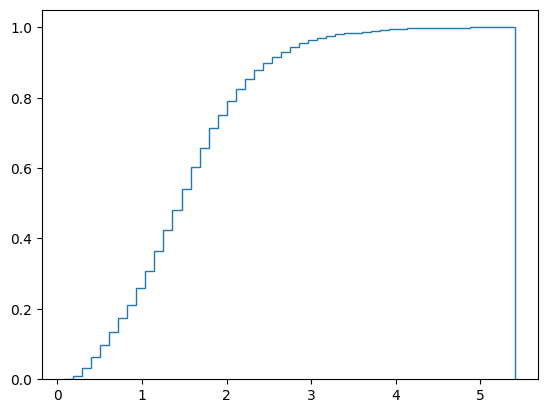

In [64]:
cdf = np.cumsum(counts) / counts.sum()

plt.stairs(cdf, edges)
plt.show()

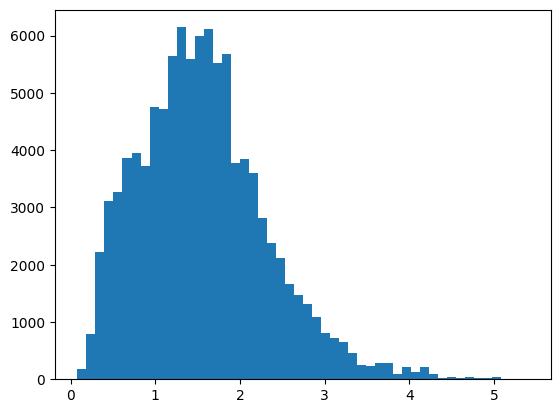

In [65]:
cdf_ext = np.insert(cdf, 0, 0)

n = 100000

u = rng.uniform(size=n)

x2 = np.zeros(n)
for i in range(cdf_ext.size - 1):
    mask = (cdf_ext[i] < u) & (u < cdf_ext[i+1])
    x2[mask] = rng.uniform(edges[i], edges[i+1], x2[mask].size)

h2 = plt.hist(x2, bins)
plt.show()


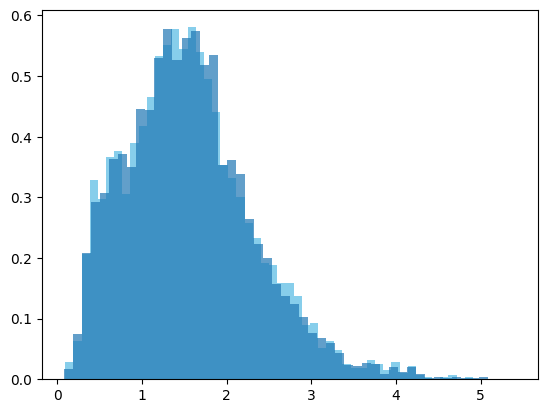

In [66]:
h1 = plt.hist(x, bins, color='skyblue', density = 'true')
h2 = plt.hist(x2, bins, alpha=0.7, density = 'true')

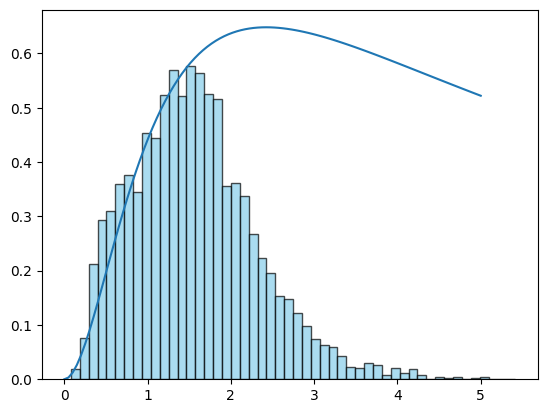

In [67]:

"TO REVIEW"

# use comoving volume function

z_vals = np.linspace(0,5,100)
comvol = astropy.cosmology.Planck18.differential_comoving_volume(z_vals).value

s = np.linspace(0,5,100)
plt.plot(s,comvol/6.5e10) ###   Arbitrary normalization, just matching by eye

plt.hist(z, bins, color='skyblue', edgecolor='black', alpha=0.7, density=True)

plt.show()
